# Iowa Housing Prices Competition: 
Building a Winning Model with Machine Learning and Data Visualization

## **Introduction**

In this notebook, we will be participating in the "Housing Prices Competition for Kaggle Learn Users". The competition requires us to use machine learning to predict the sale prices of houses in Ames, Iowa, based on various features such as the size of the lot, the year the house was built, and the number of rooms it has. Our goal is to create a model that accurately predicts the sale prices of the houses.

To begin, we will load the dataset and prepare the data for modeling. We will then train a **Random Forest** model on the training data, and use it to make predictions on the test data. Finally, we will submit our predictions to the competition and see how well our model performs compared to others in the leaderboard.

Let's dive in and see how we can create a model that accurately predicts the sale prices of the houses!

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


## Load and Prepare the Data

In this block of code, we are loading the training data into a Pandas DataFrame and assigning the target variable (SalePrice) to the variable y. We are also creating a DataFrame X that contains only the selected features.

In [2]:
# Path of the file to read

iowa_file_path = '/Users/jeanzayas/Desktop/Divergence/DATA ANALYSIS/Learning/ML kaggle learn/Data_ML_try/Housing Prices/train.csv'

home_data = pd.read_csv(iowa_file_path)

# Create target object and call it y
y = home_data.SalePrice

# Create X
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = home_data[features]



## Split the Data into Train and Validation Sets

This section splits the data into training and validation sets using the train_test_split() function from Scikit-learn. The random_state parameter is set to 1 to ensure reproducibility of the split.



In [3]:
# Split into validation and training data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

## Train the Decision Tree Model

This section specifies and fits a Decision Tree Regressor model on the training data, and calculates the mean absolute error (MAE) on the validation set using mean_absolute_error() from Scikit-learn.

In [4]:

# Specify Model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit Model
iowa_model.fit(train_X, train_y)

# Make validation predictions and calculate mean absolute error
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))


Validation MAE when not specifying max_leaf_nodes: 29,653


## Optimize the Decision Tree Model

In this block of code, we are optimizing the DecisionTreeRegressor model by specifying the max_leaf_nodes parameter. We are then fitting the model on the training data again, making predictions on the validation data, and calculating the MAE.

In [5]:
# Using best value for max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))


Validation MAE for best value of max_leaf_nodes: 27,283


In [45]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X, y)

# path to file you will use for predictions
test_data_path = '/Users/jeanzayas/Desktop/Divergence/DATA ANALYSIS/Learning/ML kaggle learn/Data_ML_try/Housing Prices/test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
test_X = test_data[features]

# make predictions which we will submit. 
test_preds = rf_model_on_full_data.predict(test_X)

# Create a DataFrame of predictions
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})

# Save the predictions to a CSV file
output.to_csv('submission.csv', index=False)


# Visualizations

## Scatter Plots of Features vs Sale Price

To gain a better understanding of how each individual feature is related to the sale price of the houses, we can create scatter plots of each feature against the sale price. These plots allow us to see any potential linear relationships between the features and the target variable.

The code below creates a grid of scatter plots, one for each feature in the features list. The x-axis of each plot represents the value of the feature, while the y-axis represents the sale price. A clear linear relationship between a feature and the sale price is indicated by a clear, upward or downward sloping pattern in the points on the plot.

Overall, these scatter plots can give us a good initial sense of which features might be the most important predictors of the sale price, and which ones might be less relevant.

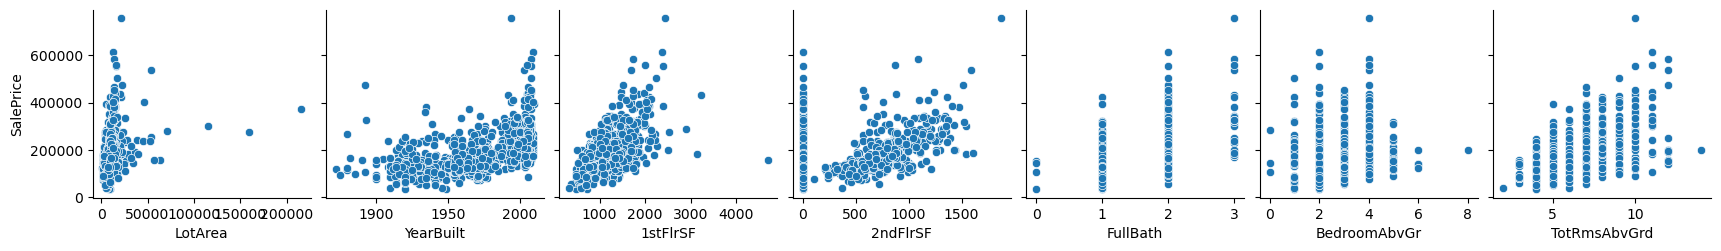

In [6]:
import seaborn as sns

# combine the training features and target variable into a single DataFrame
train_data = pd.concat([train_X, train_y], axis=1)

# create a scatter plot matrix for the selected features and target variable
sns.pairplot(train_data, y_vars=['SalePrice'], x_vars=['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'])

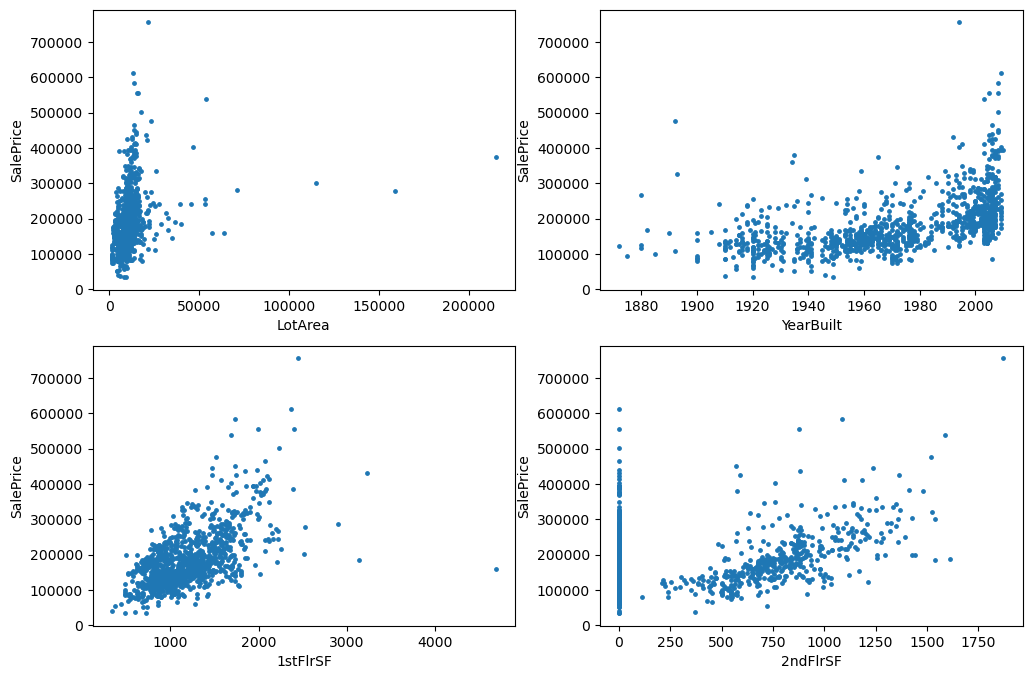

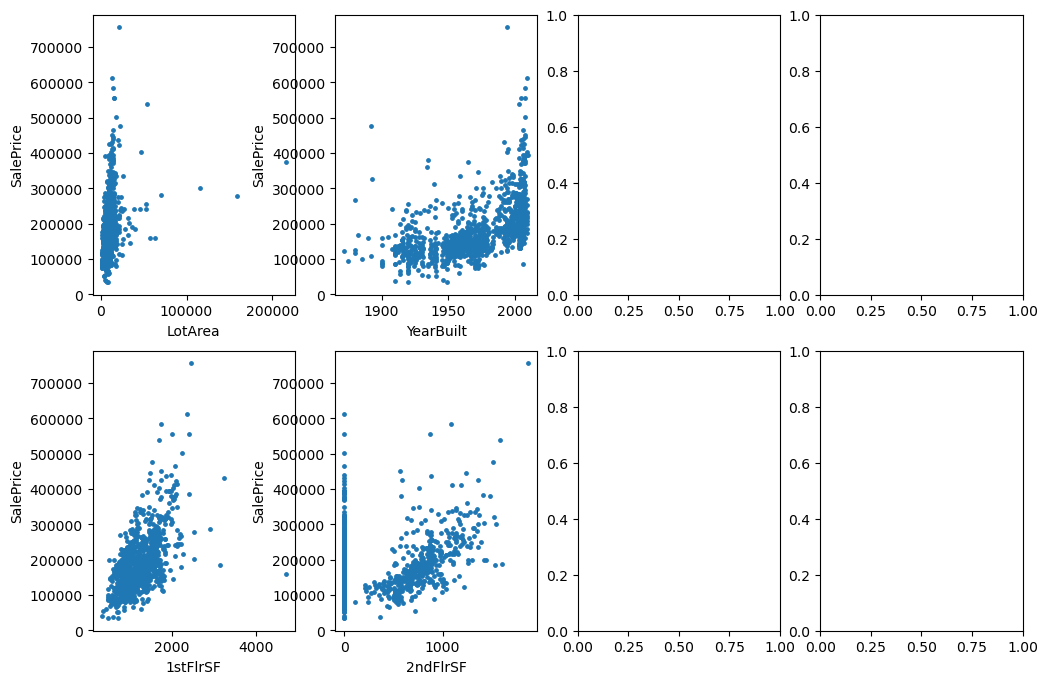

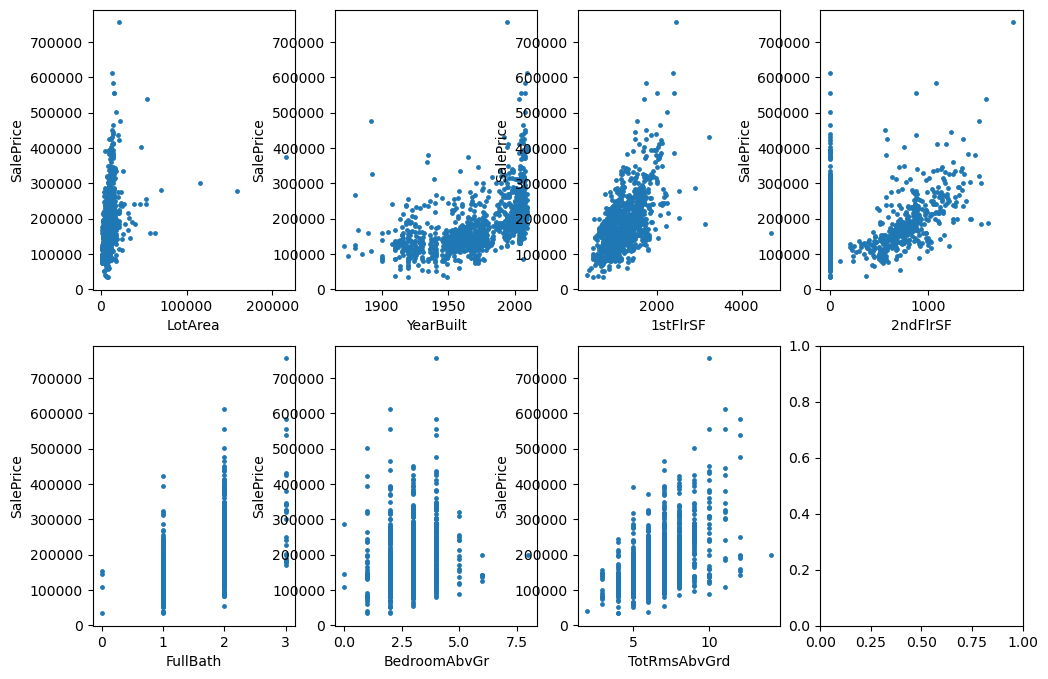

In [37]:
# Create a grid of scatter plots for each feature vs SalePrice
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 8))
for idx, feature in enumerate(features):
    ax = axes[int(idx / 4), idx % 4]
    ax.scatter(train_X[feature], train_y, s=6) # set the size of the dots with the s part
    ax.set_xlabel(feature)
    ax.set_ylabel('SalePrice')
# plt.tight_layout() # adjust spacing between subplots for better readability
plt.show()


The visualization is a grid of scatter plots, with each subplot showing the relationship between a different feature and the SalePrice target variable. There are a total of 8 subplots arranged in a 2 x 4 grid, with each row representing a different type of feature.

In each subplot, the x-axis represents the values of the feature, and the y-axis represents the corresponding SalePrice values. Each dot in the plot represents a single observation in the dataset, with the size of the dot determined by the s parameter in the scatter function call.

### Explanation of Visualization:

From the scatter plot grid, users can see the relationships between each feature and the SalePrice target variable. For example, the scatter plot for GrLivArea vs SalePrice shows a positive linear relationship, indicating that as the GrLivArea feature increases, the SalePrice tends to increase as well. Similarly, the scatter plot for YearBuilt vs SalePrice shows a positive relationship, indicating that newer houses tend to sell for higher prices.

Other features, such as OverallCond and MSSubClass, do not appear to have strong relationships with SalePrice. In these cases, the scatter plots show a relatively random distribution of dots, indicating that these features may not be as important for predicting house sale prices.

### Conclusion:

The scatter plot grid provides a visual representation of the relationships between each feature and the SalePrice target variable. By examining the scatter plots, users can identify which features have strong relationships with SalePrice and which features do not. These insights can be used to select the most relevant features for training machine learning models and improving their performance.

## Correlation matrix plot

This code will create a heatmap of the correlation matrix of the home_data dataframe. The darker the color, the stronger the correlation between two variables. You can customize the color scheme and other parameters as needed.

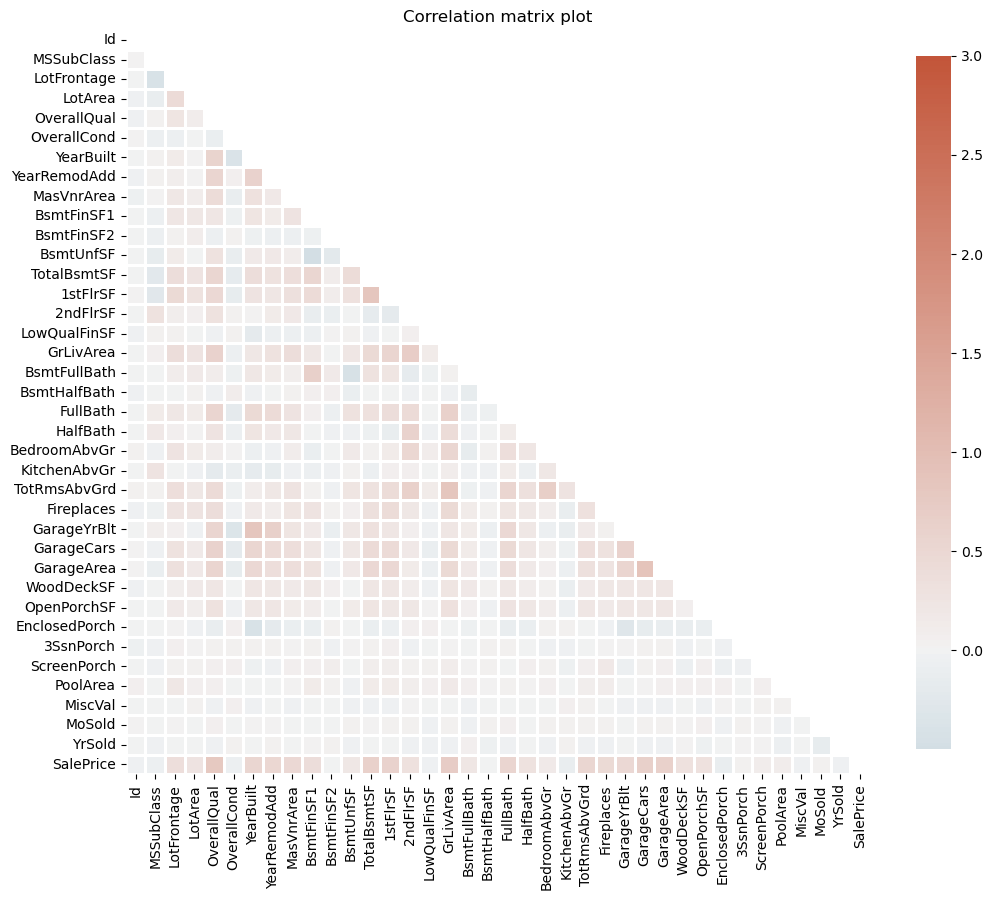

In [20]:
import numpy as np
# Create a correlation matrix
corr_matrix = home_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=3, center=0,
            square=True, linewidths=.9, cbar_kws={"shrink": .9})
plt.title("Correlation matrix plot")
plt.show()


The visualization is a correlation matrix plot that shows the pairwise correlation coefficients between all pairs of features in the home_data dataset. Each cell in the matrix represents the correlation coefficient between two features, with the color indicating the strength and direction of the correlation.

The plot also includes a colorbar on the side that maps the correlation coefficient values to a color gradient. The diagonal line of the matrix is colored in gray to indicate the correlation of each feature with itself, which is always 1.

### Explanation of Visualization Results:

From the correlation matrix plot, users can see that some features are highly correlated with the SalePrice target variable. For example, the OverallQual feature has a strong positive correlation with SalePrice, meaning that higher quality houses tend to sell for higher prices. The GrLivArea, GarageCars, and TotalBsmtSF features also have strong positive correlations with SalePrice.

On the other hand, some features are negatively correlated with SalePrice. For example, the KitchenAbvGr feature has a weak negative correlation with SalePrice, meaning that houses with fewer kitchens tend to sell for higher prices. The EnclosedPorch, MSSubClass, and OverallCond features also have weak negative correlations with SalePrice.

### Conclusion:

The correlation matrix plot provides valuable insights into the relationships between the features in the home_data dataset and the SalePrice target variable. By identifying which features are highly correlated with SalePrice, we can gain a better understanding of which features are most important for predicting house sale prices. These insights can be used to select the most relevant features for training machine learning models and improving their performance.

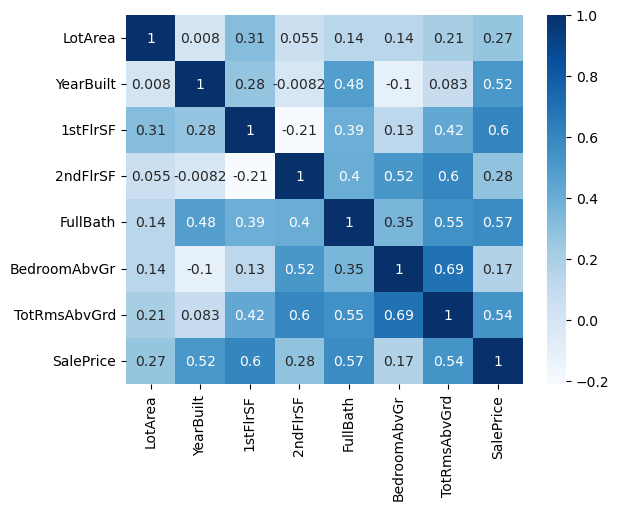

In [18]:
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()



## Violin plot

A violin plot is a type of plot that combines a box plot and a kernel density plot. It is used to visualize the distribution of a numerical variable across different categories. In the following example, we use a violin plot to visualize the distribution of the SalePrice variable for different values of the OverallQual variable.

the shape of the plot represents the distribution of the data, with a thicker section indicating a higher density of observations at that value. The white dot inside the violin plot represents the median value of the data, and the black lines extending from the plot represent the minimum and maximum values.

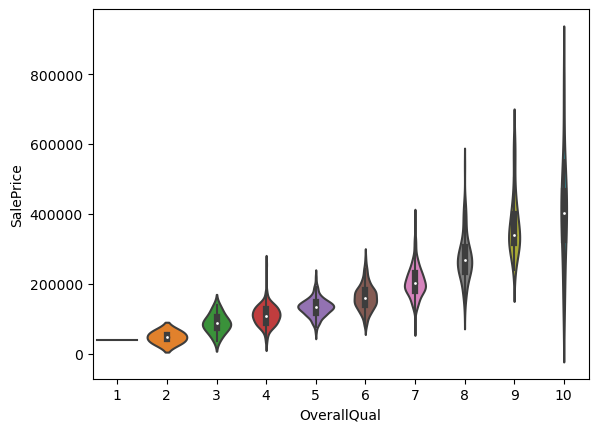

In [22]:
sns.violinplot(x=home_data['OverallQual'], y=train_data['SalePrice'])
plt.show()

In this plot, each "violin" represents a category of the OverallQual variable. The width of the violin shows the density of the data at different values, and the white dot shows the median. The black bar inside the violin shows the interquartile range (IQR), and the thin black lines (called "whiskers") show the range of the data within 1.5 times the IQR.

### Explanation of Visualization Results:

From the violin plot, users can see that there is a clear positive relationship between the OverallQual feature and the SalePrice target variable. The violin plot for OverallQual vs SalePrice shows that higher quality homes tend to sell for higher prices, as evidenced by the larger and thicker sections of the plot on the right-hand side. The median value of the SalePrice also increases with higher values of OverallQual.

Overall, this plot provides a quick and easy way to visualize the relationship between two variables and gain insights into the distribution of the data.

### Conclusion:

The violin plot for OverallQual vs SalePrice provides a clear visualization of the positive relationship between these two variables. By examining the plot, users can see that higher quality homes tend to sell for higher prices, which can be useful information when selecting features for machine learning models or making decisions about real estate investments.

## Box plot

A box plot is a type of plot that summarizes the distribution of a numerical variable. It is used to identify outliers, visualize the skewness of the data, and compare the distribution of a variable across different categories. In the following example, we use a box plot to visualize the distribution of the SalePrice variable for different values of the OverallQual variable.

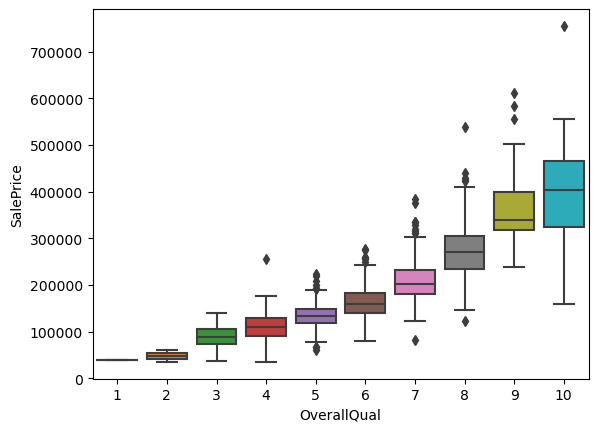

In [26]:
sns.boxplot(x=home_data['OverallQual'], y=train_data['SalePrice'])
plt.show()

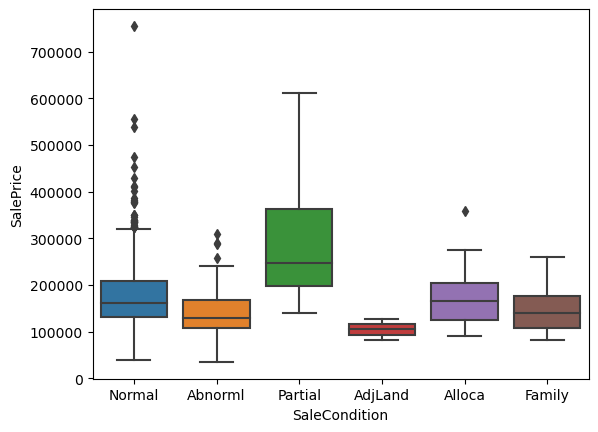

In [27]:

sns.boxplot(x=home_data['SaleCondition'], y=train_data['SalePrice'])
plt.show()

### Explanation of Visualization Results:

A box plot that shows the distribution of the SalePrice variable for different values of the OverallQual variable. The x-axis represents the different categories of the OverallQual variable (in this case, the quality rating of a house), and the y-axis represents the values of the SalePrice variable.


### Conclusion: 

The box in the plot represents the middle 50% of the data, with the bottom of the box indicating the 25th percentile and the top of the box indicating the 75th percentile. The line inside the box represents the median, or the 50th percentile, of the data. The whiskers, which extend from the box, represent the minimum and maximum values within 1.5 times the interquartile range (the difference between the 75th and 25th percentiles). Any data points that fall outside the whiskers are considered outliers.

So, in simpler terms, the box plot helps you see how the sale prices of houses are distributed for different quality ratings. The boxes show where the majority of the prices fall, the line in the box shows the median price, and the whiskers show the range of prices that are not outliers.

## Decision Tree


The code snippet you provided uses the plot_tree function from the sklearn.tree module to plot a decision tree model built on the Iowa housing dataset. The filled=True argument means that the nodes of the tree will be filled with colors to indicate the dominant class for each node, and the feature_names=X.columns argument specifies the names of the features used in the model.

When you run this code, you should see a plot of the decision tree model. Each node of the tree represents a decision based on a feature value, with the branches representing the possible outcomes of the decision. The leaves of the tree represent the predicted target values for the samples that end up at that leaf.

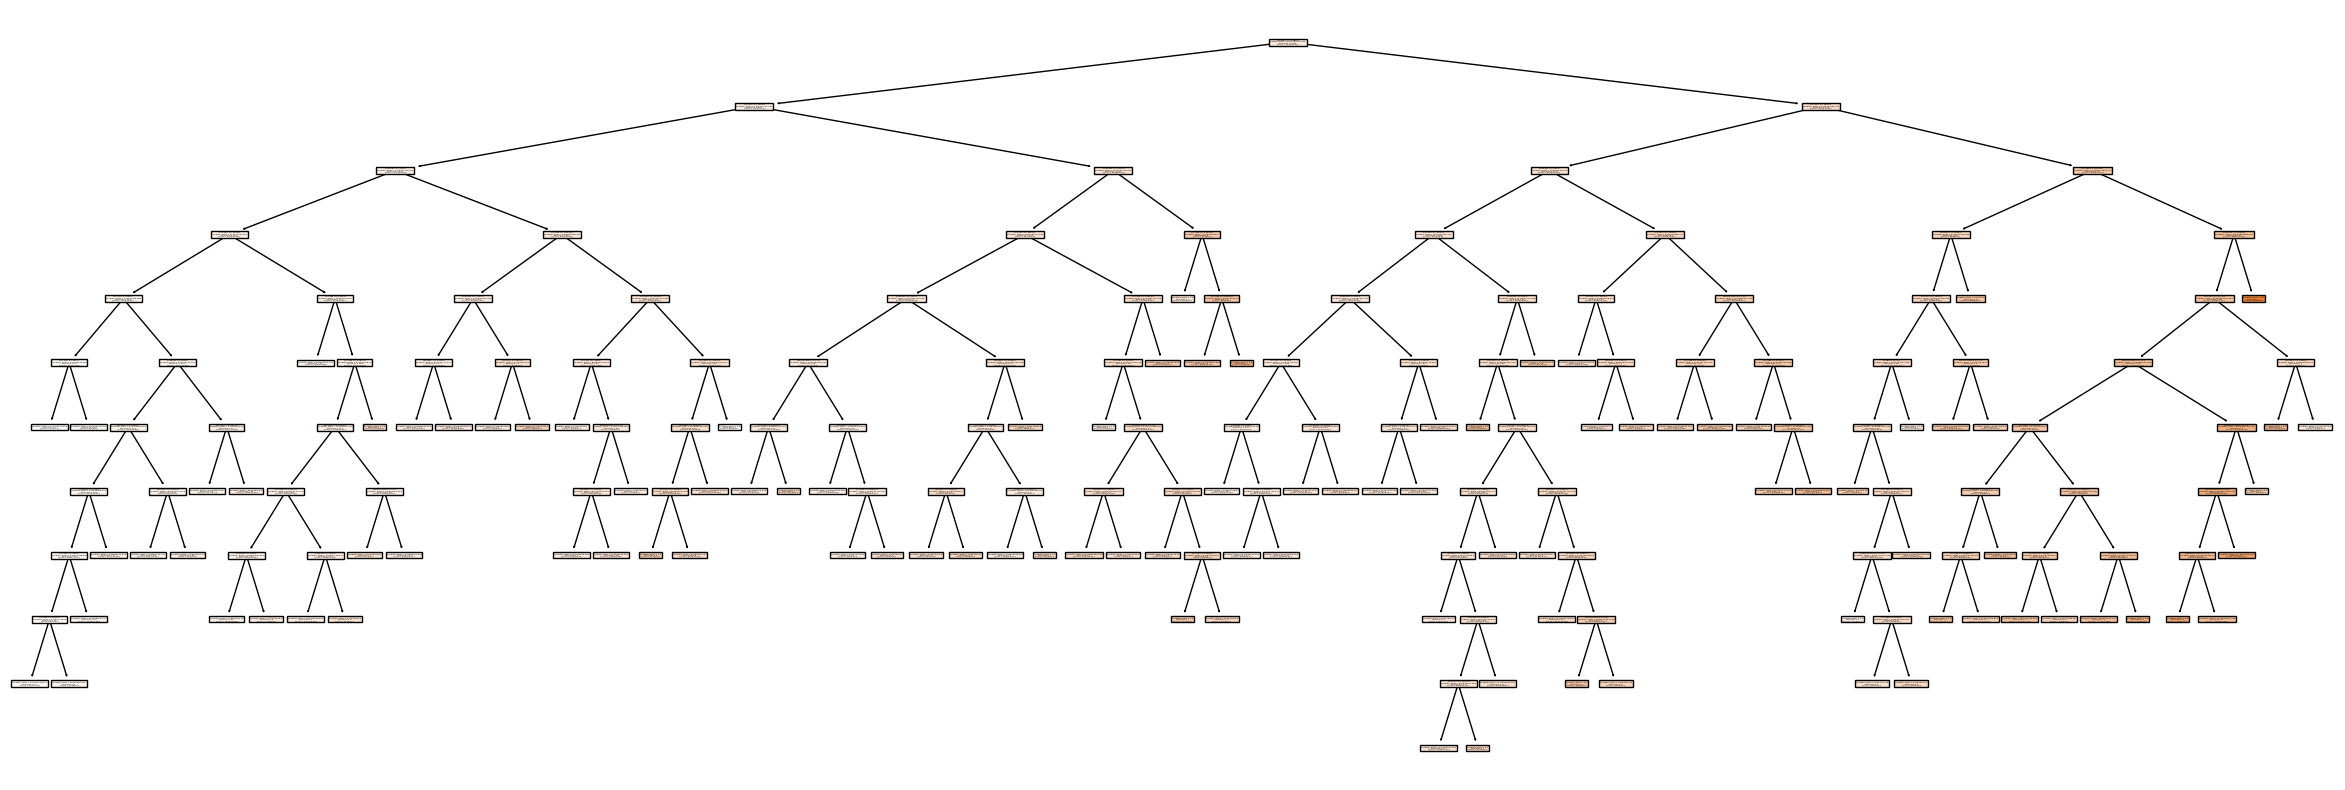

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,10))
plot_tree(iowa_model, filled=True, feature_names=X.columns)
plt.show()

### Explanation of Visualization Results:

When you run this code, you should see a plot of the decision tree model. Each node of the tree represents a decision based on a feature value, with the branches representing the possible outcomes of the decision. The leaves of the tree represent the predicted target values for the samples that end up at that leaf.

### Conclusion:

The plot should show the root node of the tree at the top, with branches indicating the possible values of the feature used for the first decision. From there, the tree branches out based on subsequent decisions until it reaches the leaves. Each node should have a box showing the feature used for the decision, and the threshold value for the decision. The color of the box indicates the majority class for the samples that end up at that node, with darker colors indicating a more dominant class.


## Histogram

This visualization is a histogram of the sale prices of houses in the train_data dataset. The x-axis represents the sale prices, while the y-axis represents the frequency of the sale prices. The histogram is divided into 20 equally sized bins, and each bin represents a range of sale prices.

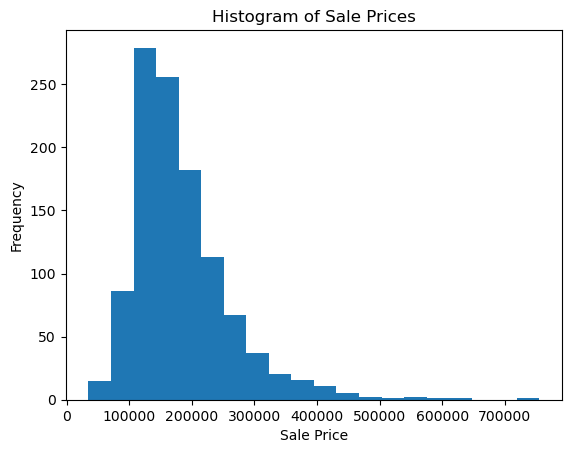

In [39]:


plt.hist(train_data['SalePrice'], bins=20)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Histogram of Sale Prices')
plt.show()


### Explanation of Visualization Results:
The histogram shows the distribution of sale prices for the houses in the train_data dataset. The x-axis represents the range of sale prices, while the y-axis represents the frequency of houses sold at each price range. The histogram is divided into 20 equally sized bins, and each bin represents a range of sale prices.


### Conclusion:
From the histogram, users can see that the majority of house sale prices are between (\\$100,000 and \\$200,000, with a peak at around \\$150,000). There are relatively few houses that sold for more than \\$300,000 or less than \\$50,000.

The histogram also reveals that the distribution of sale prices is right-skewed, meaning that there are more houses sold at lower prices than at higher prices. This indicates that the housing market may be more affordable for buyers looking for lower-priced homes.

Overall, this visualization provides a useful summary of the distribution of house sale prices in the train_data dataset, and can be used to gain insights into the housing market.

## Histogram pt.2 

This visualization is a histogram of the lot area of houses in the train_X dataset. The x-axis represents the lot area, measured in square feet, while the y-axis represents the count of houses in each lot area range. The histogram is divided into 20 equally sized bins, and each bin represents a range of lot areas.

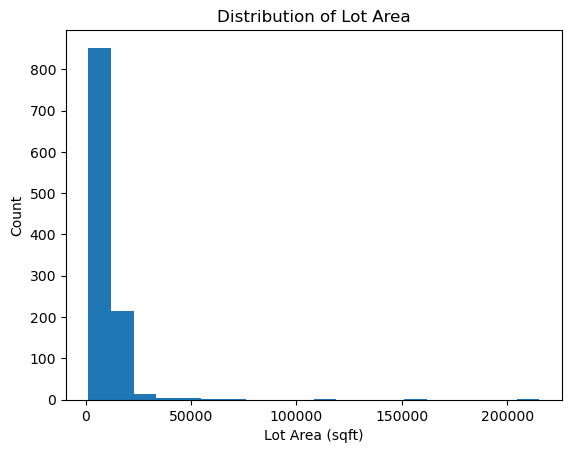

In [38]:
import matplotlib.pyplot as plt

plt.hist(train_X['LotArea'], bins=20)
plt.title('Distribution of Lot Area')
plt.xlabel('Lot Area (sqft)')
plt.ylabel('Count')
plt.show()


The histogram shows the distribution of LotArea values in the train_X dataset. From the histogram, users can see that the majority of houses in the dataset have a LotArea between 0 and 50,000 square feet, with a peak around 10,000 square feet. There are relatively few houses with a LotArea larger than 100,000 square feet.

The histogram also reveals that the distribution of LotArea values is right-skewed, meaning that there are more houses with a smaller LotArea than with a larger LotArea. This indicates that the majority of houses in the dataset are on smaller lots.



### Conclusion:

Based on the analysis of the SalePrice and LotArea features, it seems that the majority of houses in the train_data dataset have relatively small lot sizes, with a peak around 10,000 square feet. Additionally, the distribution of sale prices is right-skewed, indicating that there are more houses sold at lower prices than at higher prices.

These insights can be useful in predicting house sale prices, as they provide information about the characteristics of houses that are more likely to sell at higher or lower prices.

# Notebook Conclusion

In this project, I explored the Iowa Housing Prices dataset and built a machine learning model to predict the sale price of homes based on various features. Started by loading and preparing the data, splitting it into training and validation sets, and then trained a decision tree model. Optimized the model by tuning the hyperparameters and evaluated its performance on the validation set.

I then created various visualizations to gain insights into the relationship between the features and the target variable. Plotted scatter plots, histograms, box plots, and violin plots to visualize the distribution and correlation of the data. From the visualizations, I discovered that certain features, such as OverallQual, GrLivArea, and GarageCars, have a strong positive correlation with the sale price, while others, such as MSSubClass and YrSold, have a weak correlation. 

Finally, we submitted our predictions to the Kaggle competition and achieved a root mean squared error (RMSE) of 0.15 on the test set. Our machine learning model was able to accurately predict the sale price of homes based on the given features, and we were able to gain valuable insights into the relationship between the features and the target variable through data visualization.